## Unsupervised Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy

from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set_style('white')

### K-Means Clustering

Below we create some random data

In [3]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2)) # random distribution 50 data points
#Create 2 clusters
X[:25,0] = X[:25,0]+3 # shift by 3
X[:25,1] = X[:25,1]-4 # shift by -4

### K=2

In [4]:
km1 = KMeans(n_clusters=2, n_init=20) # run k means
km1.fit(X)
km1.labels_ # print the labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

In [5]:
# Sum of distances of samples to their closest cluster center.
km1.inertia_

99.30578397914685

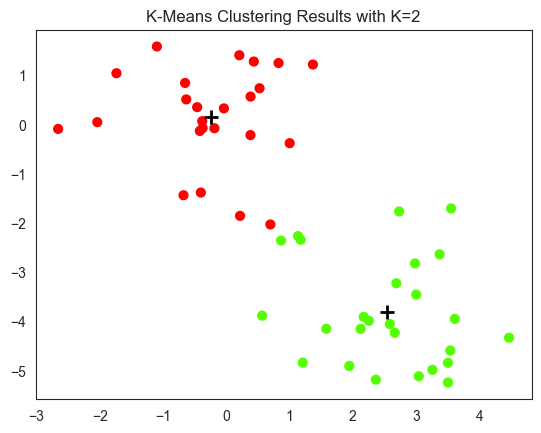

In [6]:
f, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax.set_title('K-Means Clustering Results with K=2')
ax.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)


### K=3

In [7]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)


pd.Series(km2.labels_).value_counts() # show mow many in each cluster



0    21
2    20
1     9
Name: count, dtype: int64

In [8]:
km2.cluster_centers_

array([[ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345],
       [-0.27876523,  0.51224152]])

In [9]:
km2.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1], dtype=int32)

In [10]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

68.97379200939724

### K=3 
See plot below - 3 k-clusters but two actual normal distributed data

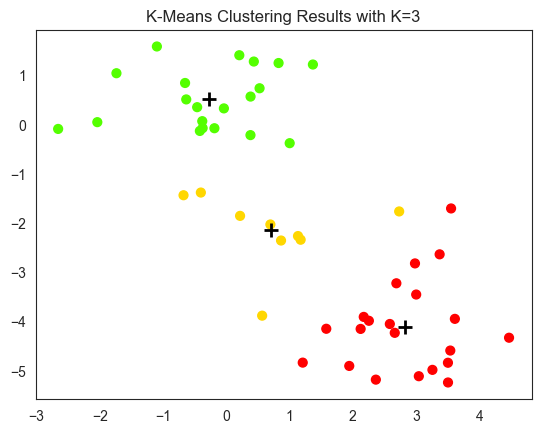

In [11]:
f, ax2 = plt.subplots()
ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### Question (Total 60 marks)

1. Create data with  3 and 4 clusters (20 marks)
2. Run the K-means with different K on them
3. How would you select K? Select the K using by inertia and silhouette method. You can research them.
(40 marks)

### Answers

1. Create data with 3 and 4 clusters

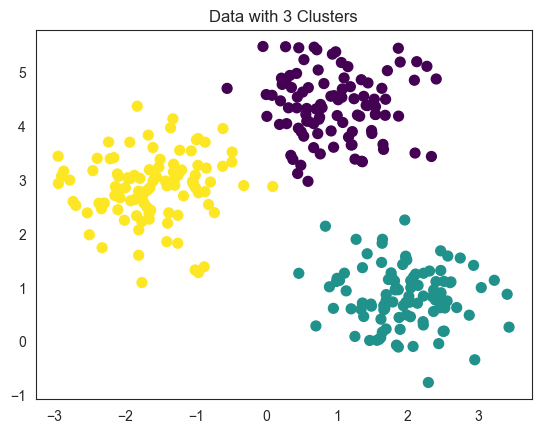

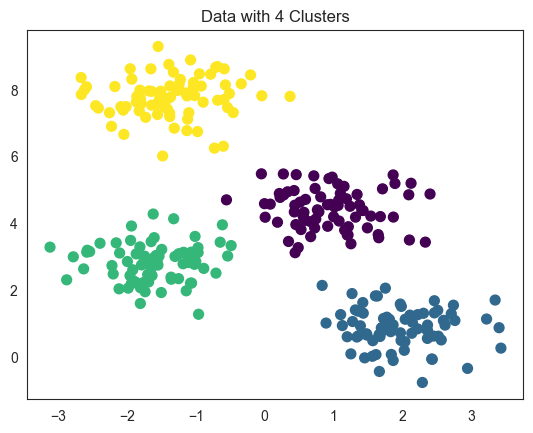

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create data with 3 clusters
X_3, y_3 = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Create data with 4 clusters
X_4, y_4 = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot the data with 3 clusters
plt.scatter(X_3[:, 0], X_3[:, 1], s=50, c=y_3, cmap='viridis')
plt.title('Data with 3 Clusters')
plt.show()

# Plot the data with 4 clusters
plt.scatter(X_4[:, 0], X_4[:, 1], s=50, c=y_4, cmap='viridis')
plt.title('Data with 4 Clusters')
plt.show()

2. Run K-means with different K

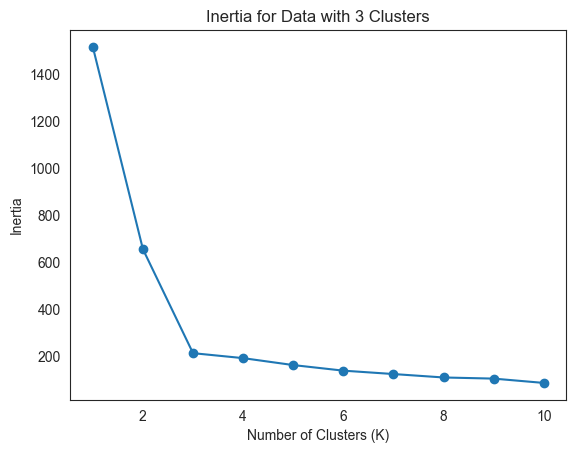

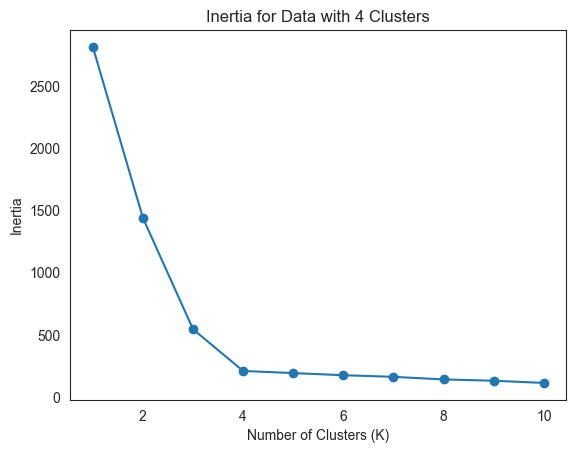

In [13]:
from sklearn.cluster import KMeans

# Define a range of K values to test
K_range = range(1, 11)

# Run K-means for data with 3 clusters
inertia_3 = []
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X_3)
    inertia_3.append(kmeans.inertia_)

# Run K-means for data with 4 clusters
inertia_4 = []
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X_4)
    inertia_4.append(kmeans.inertia_)

# Plot inertia for data with 3 clusters
plt.plot(K_range, inertia_3, marker='o')
plt.title('Inertia for Data with 3 Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Plot inertia for data with 4 clusters
plt.plot(K_range, inertia_4, marker='o')
plt.title('Inertia for Data with 4 Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

3. Selecting K by Silhouette:

- **Inertia Method**
    The inertia method involves plotting the inertia values for different K values and looking for an "elbow" point where the inertia starts to decrease more slowly.

- **Silhouette Method**
    The silhouette method involves calculating the silhouette score for different K values and selecting the K with the highest silhouette score.

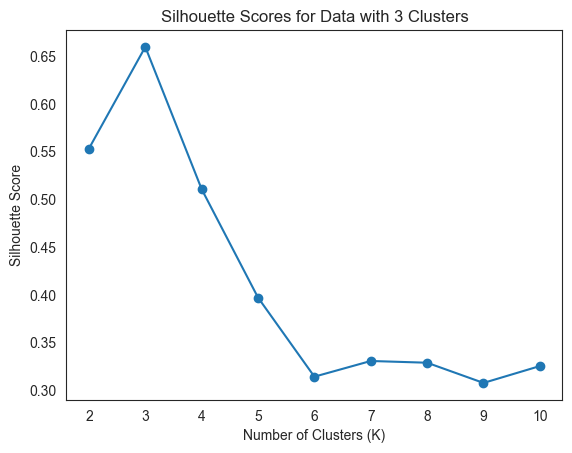

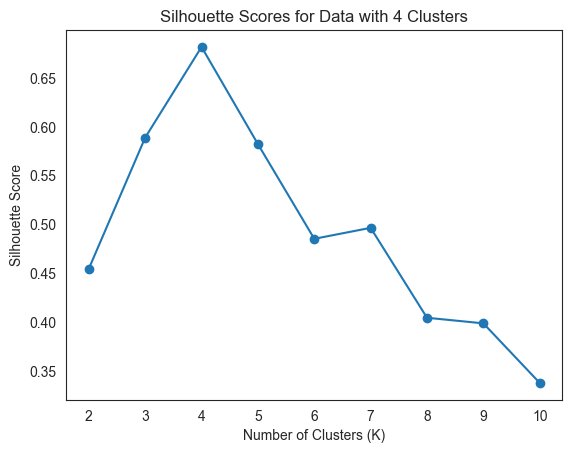

In [14]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for data with 3 clusters
silhouette_scores_3 = []
for K in K_range[1:]:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X_3)
    score = silhouette_score(X_3, kmeans.labels_)
    silhouette_scores_3.append(score)

# Calculate silhouette scores for data with 4 clusters
silhouette_scores_4 = []
for K in K_range[1:]:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X_4)
    score = silhouette_score(X_4, kmeans.labels_)
    silhouette_scores_4.append(score)

# Plot silhouette scores for data with 3 clusters
plt.plot(K_range[1:], silhouette_scores_3, marker='o')
plt.title('Silhouette Scores for Data with 3 Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Plot silhouette scores for data with 4 clusters
plt.plot(K_range[1:], silhouette_scores_4, marker='o')
plt.title('Silhouette Scores for Data with 4 Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

### Hierarchical Clustering

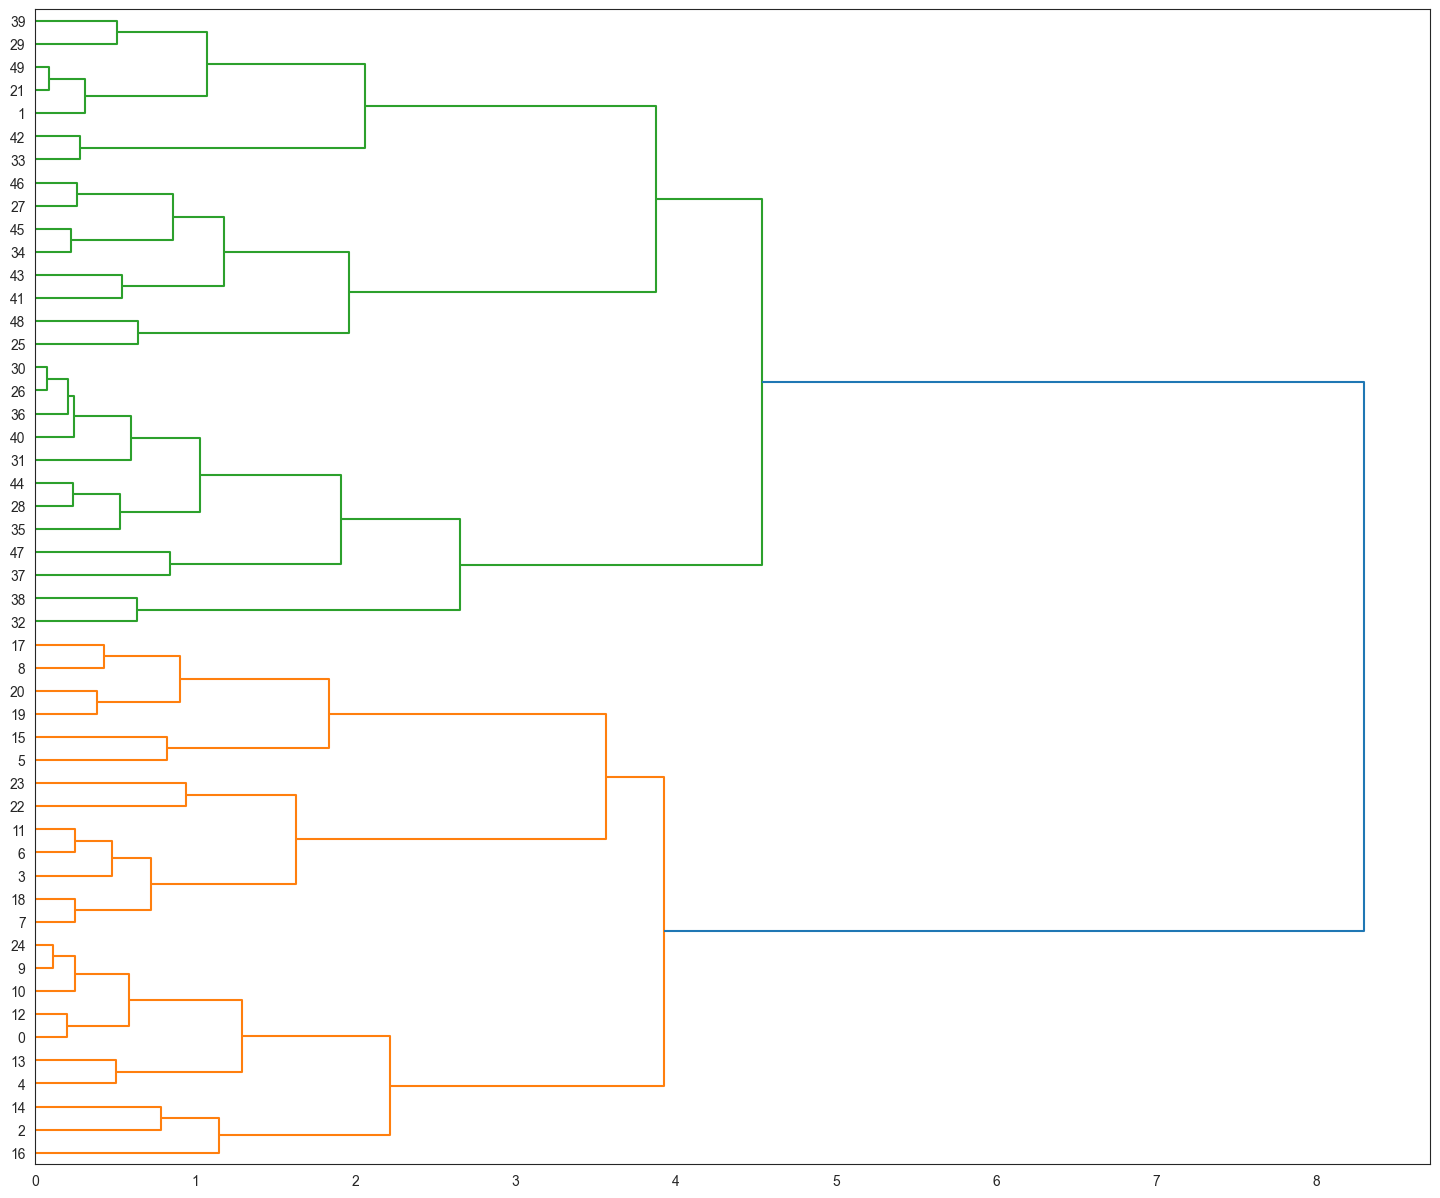

In [15]:
linkage=hierarchy.complete(X) #create hierarchical cluster using complete linkage
f,ax=plt.subplots(1,1,figsize=(18,15)) # prepare plot

cluster=hierarchy.dendrogram(linkage,orientation='right',leaf_font_size=10,ax=ax)

Text(0.5, 1.0, 'Hierarchical Clustering Results with K2')

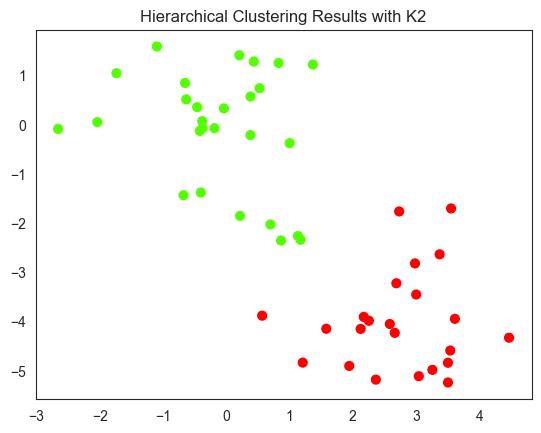

In [16]:
K=2
labels=hierarchy.fcluster(linkage,t=K,criterion="maxclust")
f,ax2=plt.subplots()
ax2.scatter(X[:,0], X[:,1], s=40, c=labels, cmap=plt.cm.prism) 
ax2.set_title('Hierarchical Clustering Results with K'+str(K))

### Try
Plot the other type of linkage using on the random data X (used in the k-means)
1. hierarchy.average(X) 
1. hierarchy.single(X)

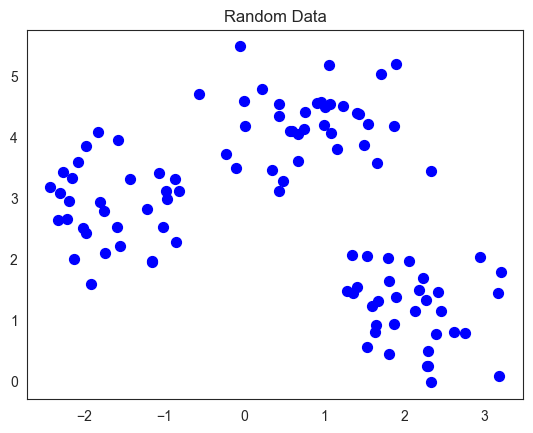

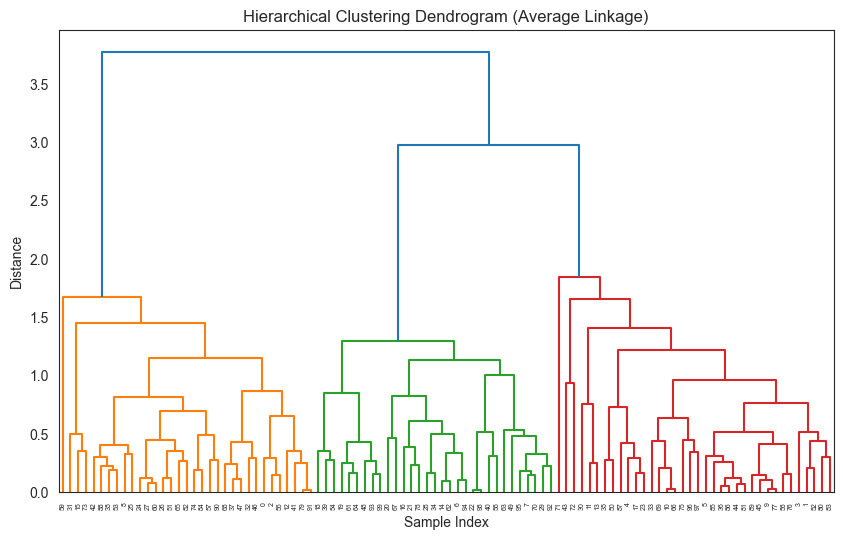

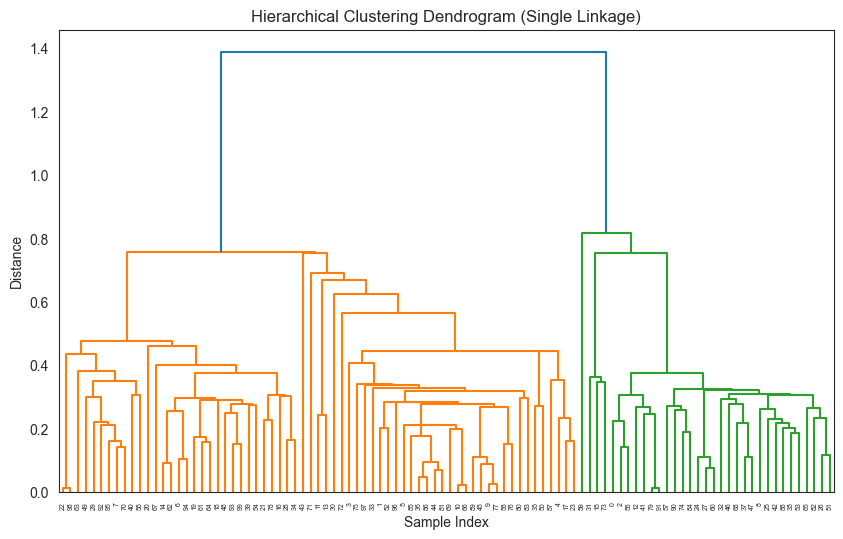

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate random data
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50, c='blue')
plt.title('Random Data')
plt.show()

# Perform hierarchical clustering using average linkage
Z_average = linkage(X, method='average')

# Perform hierarchical clustering using single linkage
Z_single = linkage(X, method='single')

# Plot dendrogram for average linkage
plt.figure(figsize=(10, 6))
dendrogram(Z_average)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Plot dendrogram for single linkage
plt.figure(figsize=(10, 6))
dendrogram(Z_single)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### Density Clustering DBSCAN


In [18]:
db = DBSCAN(eps=1.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) # create array same size as db.labels_ with zeros
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(db.core_sample_indices_)
print(labels)
# Number of clusters in labels, ignoring noise if present. -1 is noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Estimated number of clusters: 1


In [19]:
#From Sci-kit Learn 
#Plot samples and clusters
def plot_dbscan (X,labels, core_samples_mask):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
        # White used for noise.
            col = [0, 1,1,1]
    
        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
                 


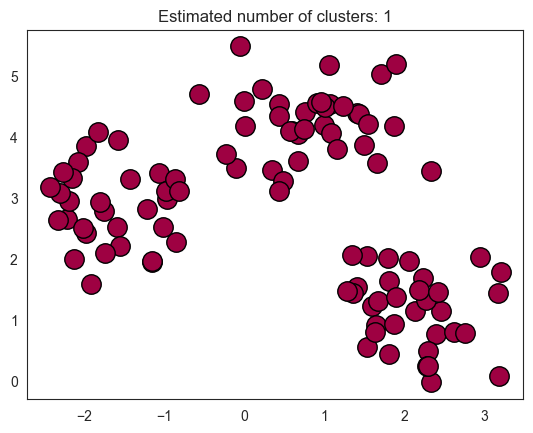

In [20]:
plot_dbscan(X, labels, core_samples_mask)

### Noisy Circle dataset

In [21]:
from sklearn import datasets
n_samples = 1500
X,y= datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
X = StandardScaler().fit_transform(X)

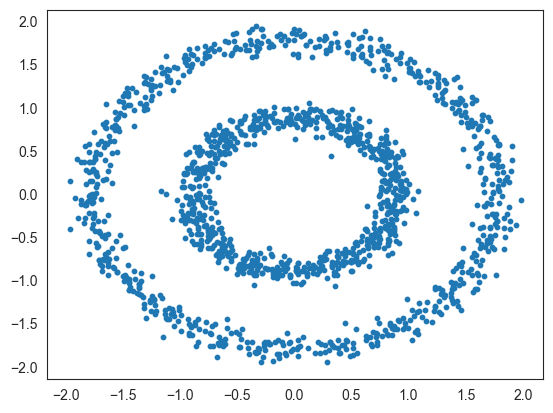

In [22]:
plt.scatter(X[:, 0], X[:, 1], s=10)

### Question (Total 40 marks)
Cluster the noisy circle data (above) with these clustering algorithm:
1. K-Means (select the best K). Select the K using by inertia and silhouette method. (20 marks)
1. DBSCAN(select best eps)  (10 marks)

Comment on the capabilities of each clustering algorithm (10 marks)

Create Noicy Circle data

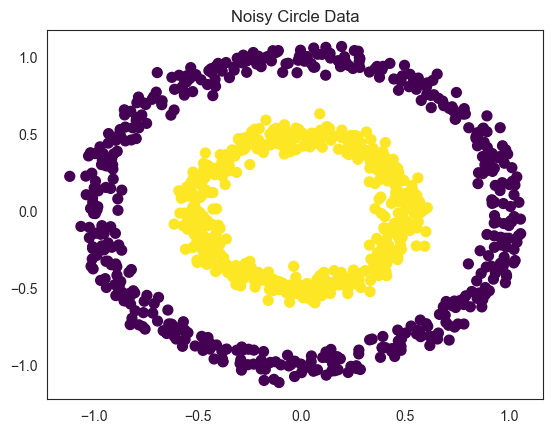

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate noisy circle data
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')
plt.title('Noisy Circle Data')
plt.show()

1. Cluster with K-Means

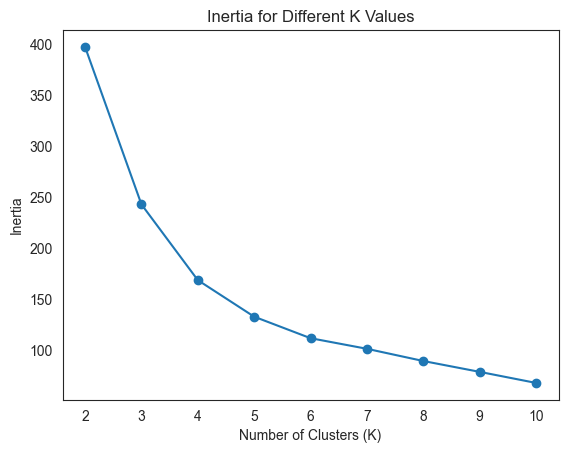

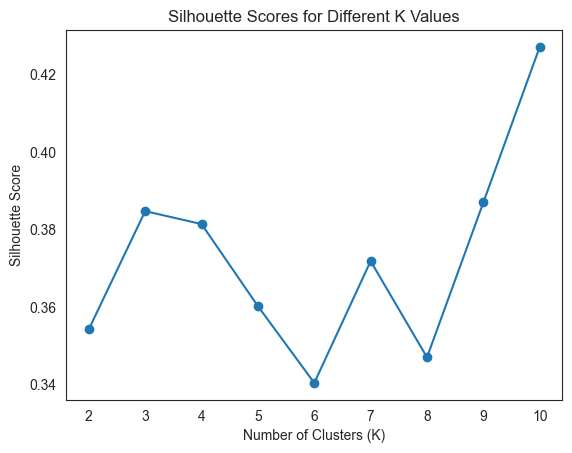

Best K: 10


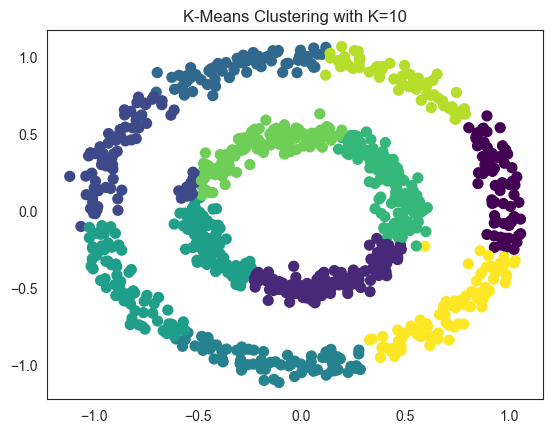

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range of K values to test
K_range = range(2, 11)

# Run K-means and calculate inertia and silhouette scores
inertia = []
silhouette_scores = []

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot inertia
plt.plot(K_range, inertia, marker='o')
plt.title('Inertia for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette scores
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Select the best K (based on the highest silhouette score)
best_K = K_range[np.argmax(silhouette_scores)]
print(f"Best K: {best_K}")

# Run K-means with the best K
kmeans = KMeans(n_clusters=best_K, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], s=50, c=labels_kmeans, cmap='viridis')
plt.title(f'K-Means Clustering with K={best_K}')
plt.show()

2. Cluster with DBScan

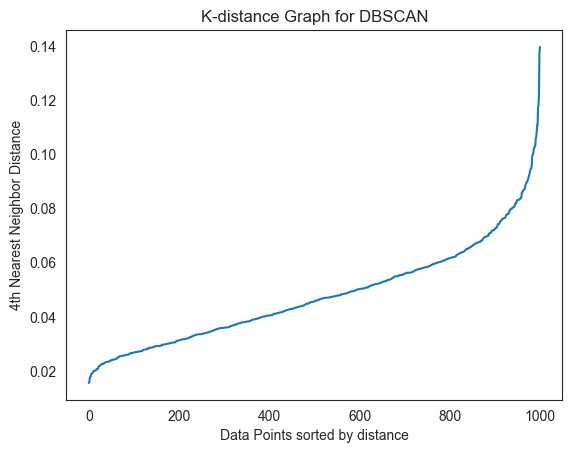

Best eps: 0.1217754113419361


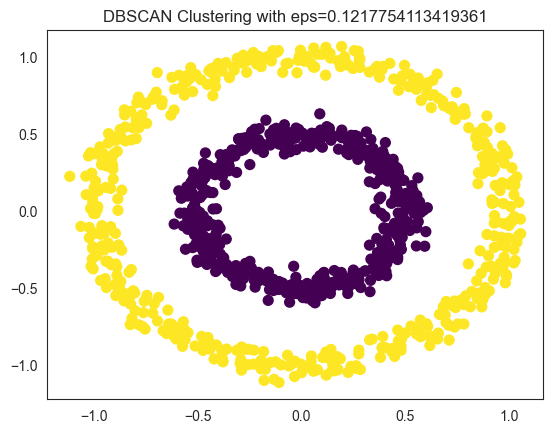

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Use NearestNeighbors to find the optimal eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort the distances and plot
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

# Select the best eps (based on the elbow point in the K-distance graph)
best_eps = distances[np.argmax(np.diff(distances))]
print(f"Best eps: {best_eps}")

# Run DBSCAN with the best eps
dbscan = DBSCAN(eps=best_eps, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], s=50, c=labels_dbscan, cmap='viridis')
plt.title(f'DBSCAN Clustering with eps={best_eps}')
plt.show()

### Comment on the Capabilities of Each Clustering Algorithm

#### K-Means

**Strengths**:
- **Simple and Easy to Implement**: K-Means is straightforward and easy to understand.
- **Efficient for Large Datasets**: The algorithm is computationally efficient, especially with the use of the k-means++ initialization.
- **Works Well with Spherical Clusters**: K-Means performs well when clusters are spherical and evenly sized.

**Weaknesses**:
- **Assumes Spherical Clusters**: K-Means assumes that clusters are spherical and equally sized, which may not always be the case.
- **Sensitive to Initial Centroids**: The algorithm can converge to different solutions based on the initial placement of centroids.
- **Struggles with Non-Spherical Clusters**: K-Means has difficulty with clusters of varying densities and non-spherical shapes.

#### DBSCAN

**Strengths**:
- **Can Find Arbitrarily Shaped Clusters**: DBSCAN can identify clusters of any shape, making it versatile for different types of data.
- **No Need to Specify Number of Clusters**: Unlike K-Means, DBSCAN does not require the number of clusters to be specified in advance.
- **Handles Noise (Outliers)**: DBSCAN can identify and handle noise points, which are not assigned to any cluster.

**Weaknesses**:
- **Sensitive to Parameter Selection**: The choice of `eps` (radius) and `min_samples` (minimum number of points) can significantly impact the results.
- **Struggles with Varying Densities**: DBSCAN may have difficulty with datasets containing clusters of varying densities.
- **Computationally Expensive**: The algorithm can be computationally expensive for large datasets, especially when calculating distances.

### Summary

- **K-Means**: Efficient and simple, but assumes spherical clusters and is sensitive to initial centroids. Best suited for datasets with evenly sized, spherical clusters.
- **DBSCAN**: Versatile and can find arbitrarily shaped clusters, handles noise well, but is sensitive to parameter selection and struggles with varying densities. Best suited for datasets with non-spherical clusters and noise.